In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split

In [5]:
cpa_data = {f'cpa{i+1}':pd.read_excel(f"CPA{i+1}.xlsx") for i in range(3)}
cpc_data = {f'cpc{i+1}':pd.read_excel(f"CPC{i+1}.xlsx") for i in range(5)}

In [6]:
print('Banyak class pada cpa_data')
for data, dataframe in cpa_data.items():
    nclass = len(dataframe.kelas.unique())
    print(f'{data}:{nclass}')
    
print()
print('Banyak class pada cpc_data')
for data, dataframe in cpc_data.items():
    nclass = len(dataframe.kelas.unique())
    print(f'{data}:{nclass}')

Banyak class pada cpa_data
cpa1:2
cpa2:2
cpa3:2

Banyak class pada cpc_data
cpc1:3
cpc2:3
cpc3:3
cpc4:3
cpc5:3


# Exploratory Data Analysis
Pada bagian ini akan dilakukan EDA untuk melihat apakah kelas pada setiap dataset balanced atau tidak.

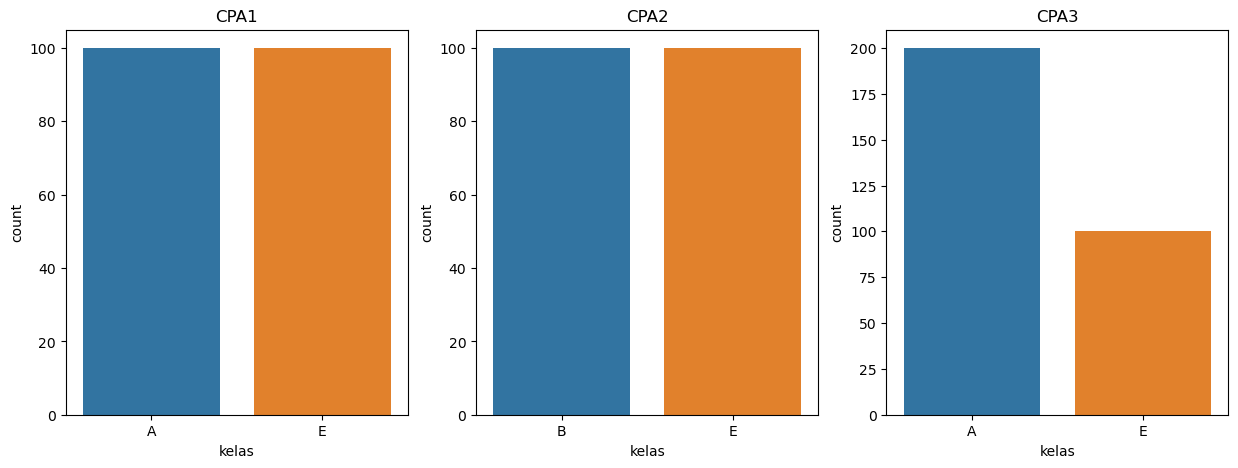

In [17]:
fig, axs = plt.subplots(1, 3, dpi = 100, figsize=(15,5))
for i , (data, dataframe) in enumerate(cpa_data.items()):
    sns.countplot(cpa_data[data], x = 'kelas', ax = axs[i])
    axs[i].set_title(f"{data.upper()}")


#sns.countplot(cpa_data['cpa3'], x =  'kelas', ax = axs[0])

<AxesSubplot:xlabel='kelas', ylabel='count'>

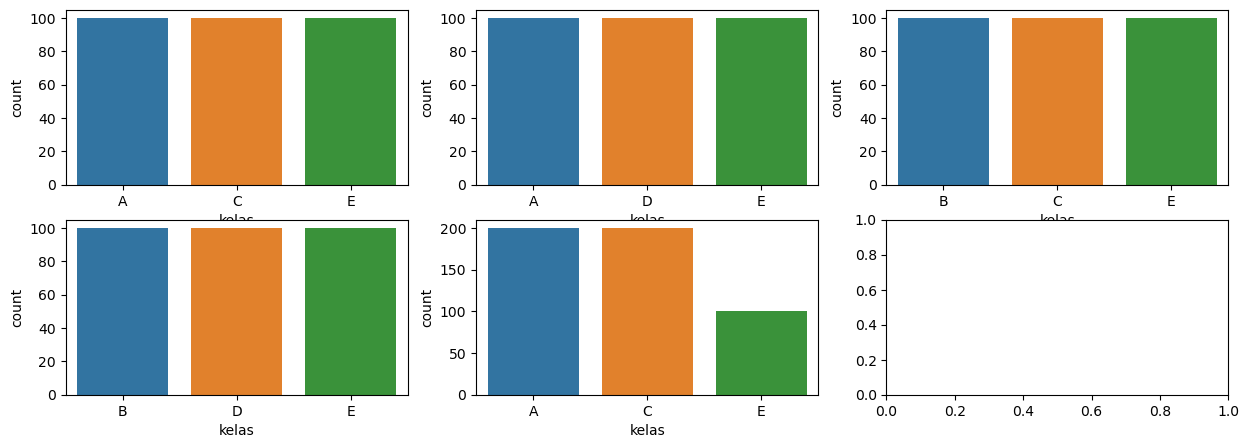

In [20]:
nrow = 2
ncol = 3
fig, axis = plt.subplots(2, 3, dpi = 100, figsize=(15,5))

sns.countplot(cpc_data['cpc1'], x = 'kelas', ax = axis[0][0])
sns.countplot(cpc_data['cpc2'], x = 'kelas', ax = axis[0][1])
sns.countplot(cpc_data['cpc3'], x = 'kelas', ax = axis[0][2])
sns.countplot(cpc_data['cpc4'], x = 'kelas', ax = axis[1][0])
sns.countplot(cpc_data['cpc5'], x = 'kelas', ax = axis[1][1])

Dapat dilihat bahwa pada data CPA3 dan CPC5 terdapat imbalance classes. Hal ini dapat mempengaruhi kepada evalution metrics model kita. Akibatnya kita perlu menyelesaikan masalah tersebut dimana kita dapat menggunakan algoritma SMOTE (atau yang lain) agar jumlah tiap kelas nya sama.

# model evaluation

In [4]:
def evaluate_model(clf, X, y, cv):
    acc = 0
    f1 = 0
    sens = 0
    spec = 0
    
    for i , (train_idx, test_idx) in enumerate(cv.split(X,y)):
        X_train , y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        
        print(f'FOLD {i + 1}:')
        f1 += f1_score(y_test, pred)
        acc += accuracy_score(y_test, pred)
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
        
        spec += tn / (tn+fp)
        sens += tp / (tp + fn)
        
        print(f'F1-Score : {f1:.4f} || Acc : {acc:.4f} || Spec : {spec:.4f} || Sens : {sens:.4f}')
    
    print('Average:')
    print(f'F1-Score : {f1 / 10:.4f} || Acc : {acc / 10:.4f} || Spec : {spec / 10:.4f} || Sens : {sens / 10:.4f}')
    
    return f1, acc , spec , sens

## CPA data

In [5]:
# with KNN

knn_A = KNeighborsClassifier(n_neighbors = 2)
cv = StratifiedKFold(n_splits = 10, random_state = 0, shuffle = True)

for data, dataframe in cpa_data.items():
    X = dataframe.drop('kelas', axis =1)
    y = dataframe['kelas']
    
    # encoder
    encoder = LabelEncoder()
    y_enc = pd.Series(encoder.fit_transform(y))
    
    f1, acc, spec, sens = evaluate_model(knn_A, X, y_enc, cv = cv)
    print()

FOLD 1:
F1-Score : 0.4286 || Acc : 0.6000 || Spec : 0.9000 || Sens : 0.3000
FOLD 2:
F1-Score : 0.9286 || Acc : 1.2000 || Spec : 1.7000 || Sens : 0.7000
FOLD 3:
F1-Score : 1.6786 || Acc : 2.0000 || Spec : 2.7000 || Sens : 1.3000
FOLD 4:
F1-Score : 2.3786 || Acc : 2.7000 || Spec : 3.4000 || Sens : 2.0000
FOLD 5:
F1-Score : 2.9500 || Acc : 3.4000 || Spec : 4.4000 || Sens : 2.4000
FOLD 6:
F1-Score : 3.5382 || Acc : 4.0500 || Spec : 5.2000 || Sens : 2.9000
FOLD 7:
F1-Score : 4.1632 || Acc : 4.7500 || Spec : 6.1000 || Sens : 3.4000
FOLD 8:
F1-Score : 4.9132 || Acc : 5.5500 || Spec : 7.1000 || Sens : 4.0000
FOLD 9:
F1-Score : 5.6405 || Acc : 6.2500 || Spec : 7.7000 || Sens : 4.8000
FOLD 10:
F1-Score : 6.3072 || Acc : 6.9500 || Spec : 8.5000 || Sens : 5.4000
Average:
F1-Score : 0.6307 || Acc : 0.6950 || Spec : 0.8500 || Sens : 0.5400

FOLD 1:
F1-Score : 0.4706 || Acc : 0.5500 || Spec : 0.7000 || Sens : 0.4000
FOLD 2:
F1-Score : 1.0956 || Acc : 1.2500 || Spec : 1.6000 || Sens : 0.9000
FOLD 3:
F

In [6]:
# with SVC

svc = SVC()
cv = StratifiedKFold(n_splits = 10, random_state = 0, shuffle = True)

for data, dataframe in cpa_data.items():
    X = dataframe.drop('kelas', axis =1)
    y = dataframe['kelas']
    
    # encoder
    encoder = LabelEncoder()
    y_enc = pd.Series(encoder.fit_transform(y))
    
    f1, acc, spec, sens = evaluate_model(svc, X, y_enc, cv = cv)
    print()

FOLD 1:
F1-Score : 0.5926 || Acc : 0.4500 || Spec : 0.1000 || Sens : 0.8000
FOLD 2:
F1-Score : 1.2133 || Acc : 0.9000 || Spec : 0.1000 || Sens : 1.7000
FOLD 3:
F1-Score : 1.8287 || Acc : 1.4000 || Spec : 0.3000 || Sens : 2.5000
FOLD 4:
F1-Score : 2.4953 || Acc : 1.9500 || Spec : 0.5000 || Sens : 3.4000
FOLD 5:
F1-Score : 3.1620 || Acc : 2.5000 || Spec : 0.7000 || Sens : 4.3000
FOLD 6:
F1-Score : 3.8763 || Acc : 3.1000 || Spec : 0.9000 || Sens : 5.3000
FOLD 7:
F1-Score : 4.3948 || Acc : 3.4500 || Spec : 0.9000 || Sens : 6.0000
FOLD 8:
F1-Score : 5.1355 || Acc : 4.1000 || Spec : 1.2000 || Sens : 7.0000
FOLD 9:
F1-Score : 5.7784 || Acc : 4.6000 || Spec : 1.3000 || Sens : 7.9000
FOLD 10:
F1-Score : 6.4451 || Acc : 5.1500 || Spec : 1.5000 || Sens : 8.8000
Average:
F1-Score : 0.6445 || Acc : 0.5150 || Spec : 0.1500 || Sens : 0.8800

FOLD 1:
F1-Score : 0.6087 || Acc : 0.5500 || Spec : 0.4000 || Sens : 0.7000
FOLD 2:
F1-Score : 1.3587 || Acc : 1.2500 || Spec : 0.9000 || Sens : 1.6000
FOLD 3:
F

In [7]:
# train/test split 75/25

# training, test = train_test_split(cpa_data['cpa1'], test_size = 0.25, random_state = 0)

# models
models = [('KNN', KNeighborsClassifier(n_neighbors = 2)),
          ('SVM', SVC())]
encoder = LabelEncoder()

for data, dataframe in cpa_data.items():
    X = dataframe.drop('kelas', axis =1)
    y = dataframe['kelas']
    yenc = encoder.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, yenc, test_size = 0.25, random_state=0)
    print(data)
    for name, model in models:
        print(name)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        f1 = f1_score(y_test,pred)
        
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
        
        spec = tn / (tn+fp)
        sens = tp / (tp + fn)
        
        print(f'Acc : {acc:.4f}, F1 : {f1:.4f}, Spec : {spec:.4f}, Sens : {sens:.4f}')
    print()
        
#         X_train, y_train = training.drop(['kelas'], axis = 1), training['kelas']
#         X_test, y_test = test.drop(['kelas'], axis = 1), test['kelas']
        
#         yenc_train, yenc_test = encoder.fit_transform(y_train),
    

cpa1
KNN
Acc : 0.6200, F1 : 0.5366, Spec : 0.8696, Sens : 0.4074
SVM
Acc : 0.4600, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000

cpa2
KNN
Acc : 0.6800, F1 : 0.6667, Spec : 0.7826, Sens : 0.5926
SVM
Acc : 0.4600, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000

cpa3
KNN
Acc : 0.7333, F1 : 0.4737, Spec : 0.9388, Sens : 0.3462
SVM
Acc : 0.6533, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000



In [8]:
# train/val/test split 50/25/25
train, val = train_test_split(cpa_data['cpa1'], test_size = 0.5, random_state = 0) # make a train/val 50/50 split
val, test = train_test_split(cpa_data['cpa1'], test_size = 0.5, random_state =0) # make a val/test 50/50 split


# models
models = [('KNN', KNeighborsClassifier(n_neighbors = 2)),
          ('SVM', SVC())]
encoder = LabelEncoder()

for data, dataframe in cpa_data.items():
    cpa = dataframe.copy()
    cpa['kelas'] = encoder.fit_transform(dataframe['kelas'])
    
    # splitting data
    train, val = train_test_split(cpa, test_size = 0.5, random_state=0)
    val, test = train_test_split(cpa, test_size = 0.5, random_state=0)
    
    X_train, y_train = train.drop(['kelas'], axis = 1), train['kelas']
    X_val, y_val = val.drop(['kelas'], axis = 1), val['kelas']
    X_test, y_test = test.drop(['kelas'], axis = 1), test['kelas']
    
    print(data)
    for name, model in models:
        print(name)
        model.fit(X_train, y_train)
        
        pred_test = model.predict(X_test)
        pred_val = model.predict(X_val)
        
        acc_test = accuracy_score(y_test, pred_test)
        acc_val = accuracy_score(y_val, pred_val)
        
        f1_test = f1_score(y_test,pred_test)
        f1_val = f1_score(y_val, pred_val)
        
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, pred_test).ravel()
        tn_val, fp_val, fn_val, tp_val = confusion_matrix(y_val, pred_val).ravel()
        
        spec_test = tn_test / (tn_test + fp_test)
        spec_val = tn_val / (tn_val + fp_val)
        
        sens_test = tp_test / (tp_test + fn_test)
        sens_val = tp_val / (tp_val + fn_val)
        
        print(f'Validation || Acc : {acc_val:.4f}, F1 : {f1_val:.4f}, Spec : {spec_val:.4f}, Sens : {sens_val:.4f}')
        print(f'Test || Acc : {acc_test:.4f}, F1 : {f1_test:.4f}, Spec : {spec_test:.4f}, Sens : {sens_test:.4f}')

    print()

cpa1
KNN
Validation || Acc : 0.8400, F1 : 0.7949, Spec : 1.0000, Sens : 0.6596
Test || Acc : 0.6400, F1 : 0.5714, Spec : 0.8511, Sens : 0.4528
SVM
Validation || Acc : 0.5300, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000
Test || Acc : 0.4700, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000

cpa2
KNN
Validation || Acc : 0.8500, F1 : 0.8101, Spec : 1.0000, Sens : 0.6809
Test || Acc : 0.6900, F1 : 0.6667, Spec : 0.8085, Sens : 0.5849
SVM
Validation || Acc : 0.5300, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000
Test || Acc : 0.4700, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000

cpa3
KNN
Validation || Acc : 0.8333, F1 : 0.6575, Spec : 1.0000, Sens : 0.4898
Test || Acc : 0.7133, F1 : 0.3582, Spec : 0.9596, Sens : 0.2353
SVM
Validation || Acc : 0.6733, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000
Test || Acc : 0.6600, F1 : 0.0000, Spec : 1.0000, Sens : 0.0000



In [16]:
cpa1 = cpa_data['cpa1']
cpa2 = cpa_data['cpa2']
cpa3 = cpa_data['cpa3']

In [21]:
cpa2.kelas.unique()

array(['B', 'E'], dtype=object)

# CPC data

In [22]:
def evaluate_model(clf, X, y, cv):
    acc = 0
    f1 = 0
    sens = 0
    spec = 0
    
    for i , (train_idx, test_idx) in enumerate(cv.split(X,y)):
        X_train , y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        
        print(f'FOLD {i + 1}:')
        f1 += f1_score(y_test, pred, average = 'macro')
        acc += accuracy_score(y_test, pred)
        n11,n12,n13,n21,n22,n23,n31,n32,n33 = confusion_matrix(y_test, pred).ravel()
        
        spec += (n22 + n23 + n32 + n33) / (n21 + n31 + n22 + n23 + n32 + n33)

        sens +=  n11 / (n11 + n12 + n13)
        
        print(f'F1-Score : {f1:.4f} || Acc : {acc:.4f} || Spec : {spec:.4f} || Sens : {sens:.4f}')
    
    print('Average:')
    print(f'F1-Score : {f1 / 10:.4f} || Acc : {acc / 10:.4f} || Spec : {spec / 10:.4f} || Sens : {sens / 10:.4f}')
    
    return f1, acc , spec , sens

In [23]:
# with KNN
clf = KNeighborsClassifier()
cv = StratifiedKFold(n_splits = 10, random_state = 0, shuffle = True)

for data, dataframe in cpc_data.items():
    X = dataframe.drop('kelas', axis =1)
    y = dataframe['kelas']
    
    # encoder
    encoder = LabelEncoder()
    y_enc = pd.Series(encoder.fit_transform(y))
    print(data)
    f1, acc, spec, sens = evaluate_model(clf, X, y_enc, cv = cv)
    print()

cpc1
FOLD 1:
F1-Score : 0.8357 || Acc : 0.8333 || Spec : 0.8500 || Sens : 0.9000
FOLD 2:
F1-Score : 1.6004 || Acc : 1.6000 || Spec : 1.7000 || Sens : 1.6000
FOLD 3:
F1-Score : 2.3037 || Acc : 2.3000 || Spec : 2.5000 || Sens : 2.1000
FOLD 4:
F1-Score : 3.0974 || Acc : 3.1000 || Spec : 3.4000 || Sens : 2.7000
FOLD 5:
F1-Score : 3.6830 || Acc : 3.7333 || Spec : 4.1000 || Sens : 3.5000
FOLD 6:
F1-Score : 4.4072 || Acc : 4.4667 || Spec : 4.9000 || Sens : 4.3000
FOLD 7:
F1-Score : 5.1417 || Acc : 5.2000 || Spec : 5.7000 || Sens : 5.0000
FOLD 8:
F1-Score : 5.8056 || Acc : 5.8667 || Spec : 6.4000 || Sens : 5.8000
FOLD 9:
F1-Score : 6.4611 || Acc : 6.5333 || Spec : 7.2500 || Sens : 6.2000
FOLD 10:
F1-Score : 7.0867 || Acc : 7.1667 || Spec : 8.0000 || Sens : 6.6000
Average:
F1-Score : 0.7087 || Acc : 0.7167 || Spec : 0.8000 || Sens : 0.6600

cpc2
FOLD 1:
F1-Score : 0.8313 || Acc : 0.8333 || Spec : 0.9000 || Sens : 0.9000
FOLD 2:
F1-Score : 1.5292 || Acc : 1.5333 || Spec : 1.7500 || Sens : 1.6000

In [24]:
# with SVC
clf = SVC()
cv = StratifiedKFold(n_splits = 10, random_state = 0, shuffle = True)

for data, dataframe in cpc_data.items():
    X = dataframe.drop('kelas', axis =1)
    y = dataframe['kelas']
    
    # encoder
    encoder = LabelEncoder()
    y_enc = pd.Series(encoder.fit_transform(y))
    print(data)
    f1, acc, spec, sens = evaluate_model(clf, X, y_enc, cv = cv)
    print()

cpc1
FOLD 1:
F1-Score : 0.3238 || Acc : 0.4333 || Spec : 0.9000 || Sens : 0.3000
FOLD 2:
F1-Score : 0.5553 || Acc : 0.8000 || Spec : 1.8000 || Sens : 0.4000
FOLD 3:
F1-Score : 0.8791 || Acc : 1.2333 || Spec : 2.7000 || Sens : 0.7000
FOLD 4:
F1-Score : 1.2071 || Acc : 1.6667 || Spec : 3.6500 || Sens : 1.0000
FOLD 5:
F1-Score : 1.6329 || Acc : 2.1667 || Spec : 4.5000 || Sens : 1.4000
FOLD 6:
F1-Score : 1.9567 || Acc : 2.6000 || Spec : 5.4000 || Sens : 1.7000
FOLD 7:
F1-Score : 2.1369 || Acc : 2.9333 || Spec : 6.3000 || Sens : 1.7000
FOLD 8:
F1-Score : 2.5148 || Acc : 3.4000 || Spec : 7.2000 || Sens : 2.2000
FOLD 9:
F1-Score : 2.8359 || Acc : 3.8333 || Spec : 8.0500 || Sens : 2.5000
FOLD 10:
F1-Score : 3.1153 || Acc : 4.2333 || Spec : 8.9000 || Sens : 2.7000
Average:
F1-Score : 0.3115 || Acc : 0.4233 || Spec : 0.8900 || Sens : 0.2700

cpc2
FOLD 1:
F1-Score : 0.3238 || Acc : 0.4333 || Spec : 0.9000 || Sens : 0.3000
FOLD 2:
F1-Score : 0.5553 || Acc : 0.8000 || Spec : 1.8000 || Sens : 0.4000

In [26]:
models = [('KNN', KNeighborsClassifier()),
          ('SVM', SVC())]
encoder = LabelEncoder()

for data, dataframe in cpc_data.items():
    X = dataframe.drop('kelas', axis =1)
    y = dataframe['kelas']
    yenc = encoder.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, yenc, test_size = 0.25, random_state=0)
    print(data)
    for name, model in models:
        print(name)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        f1 = f1_score(y_test,pred, average = 'macro')
        
        n11,n12,n13,n21,n22,n23,n31,n32,n33 = confusion_matrix(y_test, pred).ravel()
        spec = (n22 + n23 + n32 + n33) / (n21 + n31 + n22 + n23 + n32 + n33) 
#         print(f'atas ; {(n22 + n23 + n32 + n33)}')
#         print(f'bawah : {(n21 + n31 + n22 + n23 + n32 + n33)}')
        
#         atas = n22 + n23 + n32 + n33
#         bawah = n21 + n31 + n22 + n23 + n32 + n33
        sens =  n11 / (n11 + n12 + n13)
        
        print(f'Acc : {acc:.4f}, F1 : {f1:.4f}, Spec : {spec:.4f}, Sens : {sens:.4f}')
    print()

cpc1
KNN
Acc : 0.6933, F1 : 0.6867, Spec : 0.8039, Sens : 0.5000
SVM
Acc : 0.3200, F1 : 0.1616, Spec : 0.0000, Sens : 1.0000

cpc2
KNN
Acc : 0.6000, F1 : 0.5966, Spec : 0.7843, Sens : 0.6250
SVM
Acc : 0.3200, F1 : 0.1616, Spec : 0.0000, Sens : 1.0000

cpc3
KNN
Acc : 0.7067, F1 : 0.6985, Spec : 0.7451, Sens : 0.6667
SVM
Acc : 0.3200, F1 : 0.1616, Spec : 0.0000, Sens : 1.0000

cpc4
KNN
Acc : 0.5867, F1 : 0.5711, Spec : 0.7647, Sens : 0.7083
SVM
Acc : 0.3200, F1 : 0.1616, Spec : 0.0000, Sens : 1.0000

cpc5
KNN
Acc : 0.6960, F1 : 0.6164, Spec : 0.7051, Sens : 0.8511
SVM
Acc : 0.3760, F1 : 0.1822, Spec : 0.0000, Sens : 1.0000



In [28]:
# train/val/test split 50/25/25
# train, val = train_test_split(cpa_data['cpa1'], test_size = 0.5, random_state = 0) # make a train/val 50/50 split
# val, test = train_test_split(cpa_data['cpa1'], test_size = 0.5, random_state =0) # make a val/test 50/50 split


# models
models = [('KNN', KNeighborsClassifier()),
          ('SVM', SVC())]
encoder = LabelEncoder()

for data, dataframe in cpc_data.items():
    cpc = dataframe.copy()
    cpc['kelas'] = encoder.fit_transform(dataframe['kelas'])
    
    # splitting data
    train, val = train_test_split(cpc, test_size = 0.5, random_state=0)
    val, test = train_test_split(cpc, test_size = 0.5, random_state=0)
    
    X_train, y_train = train.drop(['kelas'], axis = 1), train['kelas']
    X_val, y_val = val.drop(['kelas'], axis = 1), val['kelas']
    X_test, y_test = test.drop(['kelas'], axis = 1), test['kelas']
    
    print(data)
    for name, model in models:
        print(name)
        model.fit(X_train, y_train)
        
        pred_test = model.predict(X_test)
        pred_val = model.predict(X_val)
        
        acc_test = accuracy_score(y_test, pred_test)
        acc_val = accuracy_score(y_val, pred_val)
        
        f1_test = f1_score(y_test,pred_test, average = 'macro')
        f1_val = f1_score(y_val, pred_val, average = 'macro')
        
        n11_test, n12_test, n13_test, n21_test, n22_test, n23_test, n31_test, n32_test, n33_test = confusion_matrix(y_test, pred_test).ravel()
        n11_val, n12_val, n13_val, n21_val, n22_val, n23_val, n31_val, n32_val, n33_val = confusion_matrix(y_val, pred_val).ravel()
        
        spec_test = (n22_test + n23_test + n32_test + n33_test) / (n21_test + n31_test + n22_test + n23_test + n32_test + n33_test) 
        spec_val = (n22_val + n23_val + n32_val + n33_val) / (n21_val + n31_val + n22_val + n23_val + n32_val + n33_val) 
        
        sens_test = n11_test / (n11_test + n12_test + n13_test)
        sens_val = n11_val / (n11_val + n12_val + n13_val)
        
        print(f'Validation || Acc : {acc_val:.4f}, F1 : {f1_val:.4f}, Spec : {spec_val:.4f}, Sens : {sens_val:.4f}')
        print(f'Test || Acc : {acc_test:.4f}, F1 : {f1_test:.4f}, Spec : {spec_test:.4f}, Sens : {sens_test:.4f}')

    print()

cpc1
KNN
Validation || Acc : 0.7267, F1 : 0.7270, Spec : 0.7980, Sens : 0.7059
Test || Acc : 0.6933, F1 : 0.6818, Spec : 0.8218, Sens : 0.6327
SVM
Validation || Acc : 0.3400, F1 : 0.1692, Spec : 0.0000, Sens : 1.0000
Test || Acc : 0.3267, F1 : 0.1642, Spec : 0.0000, Sens : 1.0000

cpc2
KNN
Validation || Acc : 0.7867, F1 : 0.7827, Spec : 0.8687, Sens : 0.7843
Test || Acc : 0.6200, F1 : 0.6014, Spec : 0.7921, Sens : 0.6327
SVM
Validation || Acc : 0.3400, F1 : 0.1692, Spec : 0.0000, Sens : 1.0000
Test || Acc : 0.3267, F1 : 0.1642, Spec : 0.0000, Sens : 1.0000

cpc3
KNN
Validation || Acc : 0.7533, F1 : 0.7494, Spec : 0.8081, Sens : 0.8235
Test || Acc : 0.6733, F1 : 0.6582, Spec : 0.7525, Sens : 0.6531
SVM
Validation || Acc : 0.3400, F1 : 0.1692, Spec : 0.0000, Sens : 1.0000
Test || Acc : 0.3267, F1 : 0.1642, Spec : 0.0000, Sens : 1.0000

cpc4
KNN
Validation || Acc : 0.7667, F1 : 0.7610, Spec : 0.8384, Sens : 0.8039
Test || Acc : 0.6267, F1 : 0.6080, Spec : 0.8218, Sens : 0.6327
SVM
Validat